<a href="https://colab.research.google.com/github/Bhavana12S/facemaskdetection-/blob/main/facemaskdetection5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing Face Mask Dataset

In [1]:
#a API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:03<00:00, 89.3MB/s]
100% 163M/163M [00:03<00:00, 56.4MB/s]


In [2]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split




In [4]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1648.jpg', 'with_mask_3175.jpg', 'with_mask_2328.jpg', 'with_mask_1999.jpg', 'with_mask_901.jpg']
['with_mask_1672.jpg', 'with_mask_3601.jpg', 'with_mask_2371.jpg', 'with_mask_1810.jpg', 'with_mask_527.jpg']


In [5]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2122.jpg', 'without_mask_1249.jpg', 'without_mask_1207.jpg', 'without_mask_2763.jpg', 'without_mask_1067.jpg']
['without_mask_1209.jpg', 'without_mask_3188.jpg', 'without_mask_512.jpg', 'without_mask_2058.jpg', 'without_mask_2875.jpg']


In [17]:
print("Number of with mask images",len(with_mask_files))
print("Number of without mask images",len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


Creating lables for the two class of images

with mask --> 1
without mask --> 0


In [18]:
#create the lables
with_mask_lable = [1]*3725

without_mask_lable = [0]*3828

In [19]:
print(with_mask_lable[0:5])

print(without_mask_lable[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
print(len(with_mask_lable))

print(len(without_mask_lable))

3725
3828


In [21]:
labels = with_mask_lable + without_mask_lable

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


To know the shape of the image
Displaying images

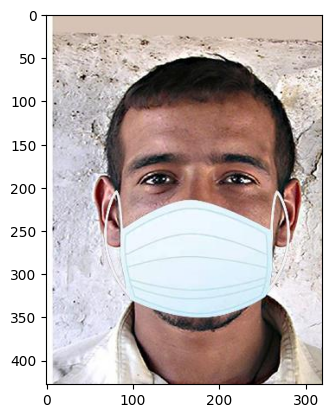

In [22]:
#displaying with mask image
img = mping.imread('/content/data/with_mask/with_mask_1672.jpg')
implot = plt.imshow(img)
plt.show()


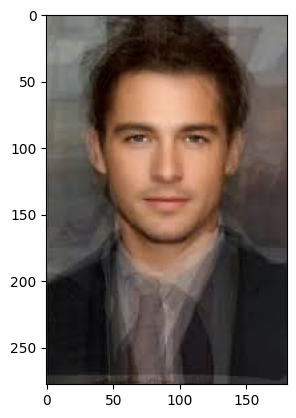

In [23]:
#displaying without mask image
img = mping.imread('/content/data/without_mask/without_mask_2122.jpg')
implot = plt.imshow(img)
plt.show()

Image processing

1.Resize the images
2.Convert images to numpy arrays

In [24]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data =[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'



for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 5,  5,  5],
        [ 1,  1,  1],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [47, 47, 47],
        [74, 74, 74],
        [62, 62, 62]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
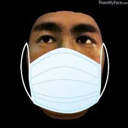

In [27]:
data[0]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
#converting image list and label list to numpy array

x=np.array(data)
y=np.array(labels)

In [31]:
type(y)

numpy.ndarray

In [32]:
type(x)

numpy.ndarray

In [33]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(y)

[1 1 1 ... 0 0 0]


Train test Split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
#scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

array([[[ 1,  1,  1],
        [ 4,  4,  4],
        [ 8,  8,  8],
        ...,
        [33, 20, 16],
        [29, 17, 15],
        [36, 20, 20]],

       [[ 2,  2,  2],
        [ 5,  5,  5],
        [ 8,  8,  8],
        ...,
        [34, 21, 17],
        [31, 19, 17],
        [37, 22, 20]],

       [[ 2,  2,  2],
        [ 3,  3,  3],
        [ 6,  6,  6],
        ...,
        [35, 21, 17],
        [31, 19, 17],
        [38, 23, 20]],

       ...,

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [66, 37, 33],
        [62, 34, 30],
        [57, 32, 28]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [62, 32, 29],
        [59, 31, 26],
        [56, 30, 25]],

       [[27, 27, 27],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [74, 48, 43],
        [71, 48, 42],
        [69, 47, 41]]], dtype=uint8)
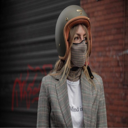

In [38]:
x_train[0]

In [39]:
x_train_scaled[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.01568627, 0.01568627, 0.01568627],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.12941176, 0.07843137, 0.0627451 ],
        [0.11372549, 0.06666667, 0.05882353],
        [0.14117647, 0.07843137, 0.07843137]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01960784, 0.01960784, 0.01960784],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.13333333, 0.08235294, 0.06666667],
        [0.12156863, 0.0745098 , 0.06666667],
        [0.14509804, 0.08627451, 0.07843137]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.1372549 , 0.08235294, 0.06666667],
        [0.12156863, 0.0745098 , 0.06666667],
        [0.14901961, 0.09019608, 0.07843137]],

       ...,

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0

Building a convolutional neural network

In [40]:
import tensorflow as tf
from tensorflow import keras


In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))



#output layer
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])



In [43]:
#training the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - acc: 0.7099 - loss: 0.6171 - val_acc: 0.8810 - val_loss: 0.2649
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.8933 - loss: 0.2716 - val_acc: 0.9008 - val_loss: 0.2189
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9158 - loss: 0.2122 - val_acc: 0.9107 - val_loss: 0.1977
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9324 - loss: 0.1751 - val_acc: 0.8893 - val_loss: 0.2869
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9349 - loss: 0.1670 - val_acc: 0.9289 - val_loss: 0.1807


MODEL EVALUATION

In [44]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9200 - loss: 0.2529
Test Accuracy = 0.9159497022628784


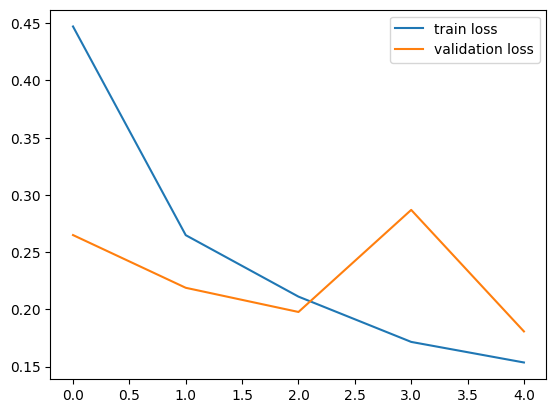

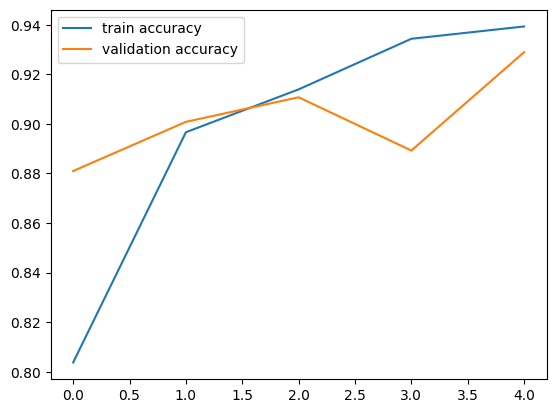

In [45]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Predictive system

In [ ]:
input_image_path = input("path of the image to be predictaed:")

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print('The person in the image is wearing mask')

else:
  print('The person in the image is not wearing mask')